Choose a Stakeholder!
- What drives price!
Ideas for the project
- Predict models suited for family homes designated for kids (family size!)
    ~ price, bedrooms, bathrooms, sqft_lot(includes yard space), sqft_living, waterfront / view(depends of age of kids),
    condition, etc.
    
- Making money $$$
    ~ Cheap houses compared to value (resale)
    ~ Flipping Houses 

- Model for predicting/ suiting houses for particular age groups (inline with Hanis idea)

- Analyze crime rates

Summarize
create a prediction website that will help people find affordable housting in this area
use living space, 
find people the opportunity to find fixers upper to increase their investment, and find relatable houses for family desires/ needs.


## All imports needed

In [1]:
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor

## Loading in Data

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

## Looking at the layout and basic information

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Looking into mapping applications

In [6]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

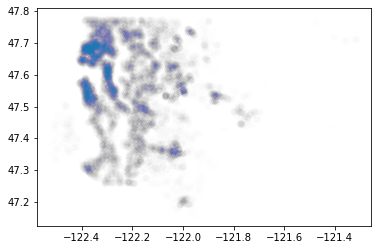

In [7]:
fig, ax=plt.subplots()
ax.scatter(df['long'], df['lat'], alpha=.005)

## Looking into correlations that drive price

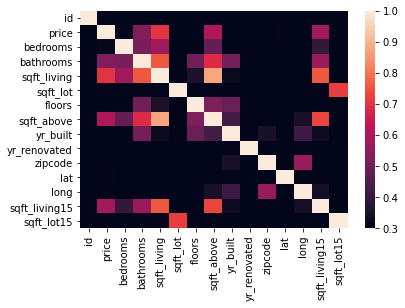

In [8]:
sns.heatmap(df.corr().abs(),vmin=.30, vmax=1);

Hard to read.  But see that bathrooms, sqft_living, sqft_above, and sqft_livign15 contain correlation with price with sqft_living being the highest.

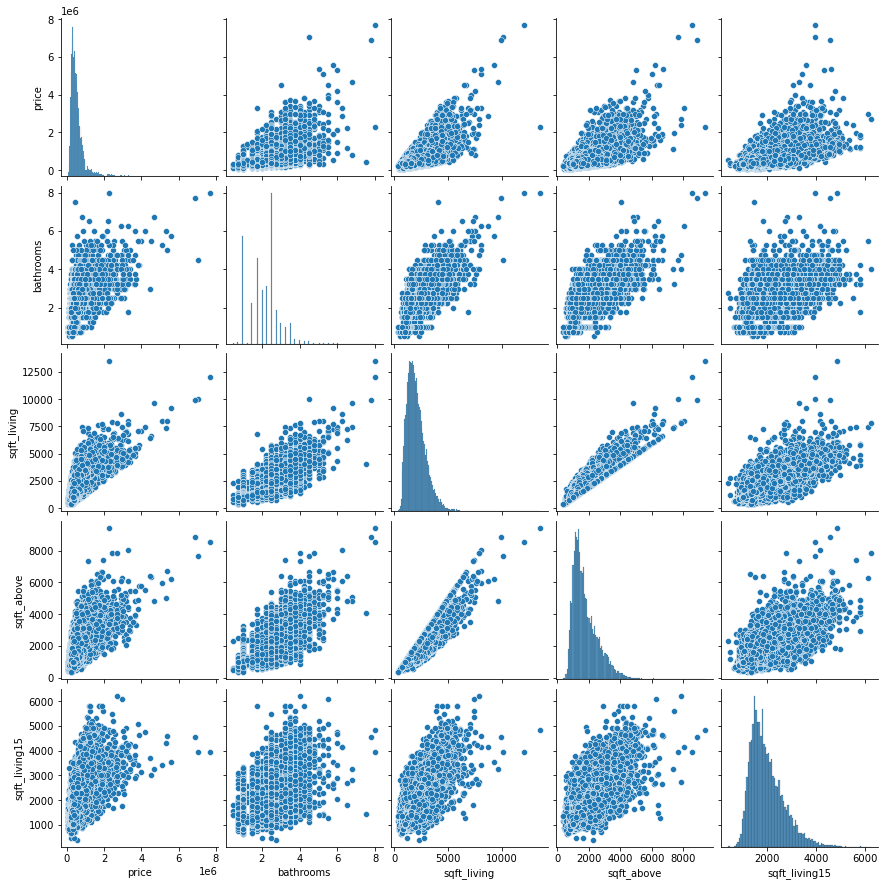

In [9]:
first_price_correlation = df[['price', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15']]
sns.pairplot(first_price_correlation);

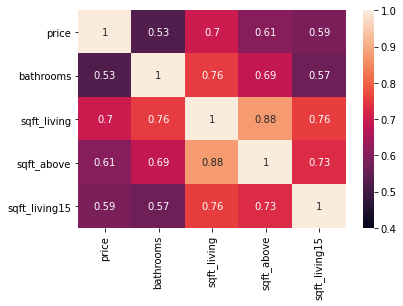

In [10]:
sns.heatmap(first_price_correlation.corr().abs(),vmin=.40, vmax=1, annot=True);

sqft_living and sqft above appear to have collinearity.  Droppping sqft_above

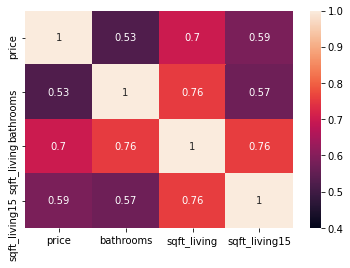

In [11]:
second_price_correlation = df[['price', 'bathrooms', 'sqft_living', 'sqft_living15']]
sns.heatmap(second_price_correlation.corr().abs(),vmin=.40, vmax=1, annot=True); #clean up y axis overcrowdign and uncentered

In [12]:
formula = 'price ~ sqft_living'
first_mod = ols(formula, df).fit()
first_mod_summary = first_mod.summary()
first_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:56:07   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cleaning up yr_renovated column

In [13]:
df['yr_renovated'].unique() # quick look at all the values

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [14]:
df['renovated'] = df['yr_renovated'] #created a new column for boolean values for if it has been renovated or not

In [15]:
df.loc[df['renovated'] > 0, 'renovated'] = 1 #converted all houses that have been renovated to have a value of 1
df['renovated'].fillna(0, inplace=True) # assuming that nulls values have a value of 0
# all values in this column should be a 0 or 1 now as representing no and yes for has the house been renovated

Looking at correlation between grade and sqft_living

In [16]:
df['grade_number'] = df['grade'].str.split() # converting grade to only contain the number.  
                                                #Split the number and word by the space
df['grade_number'] = [int(x[0]) for x in df['grade_number']] #list comprehension to only take the first element

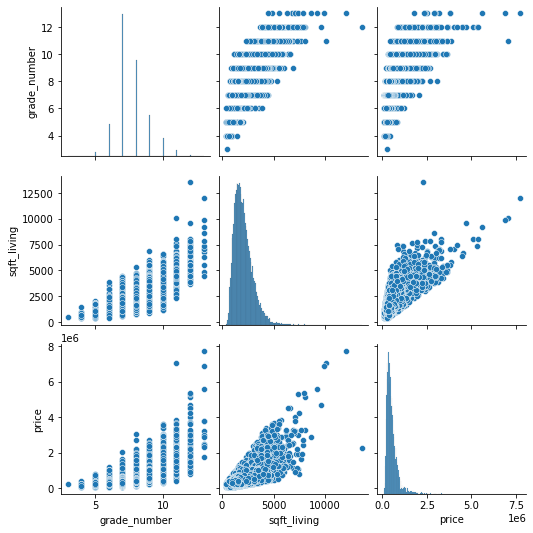

In [17]:
test_plot = df[['grade_number', 'sqft_living','price']]
sns.pairplot(test_plot);

In [18]:
test_plot.corr()

,grade_number,sqft_living,price
grade_number,1.000000,0.762779,0.667951
sqft_living,0.762779,1.000000,0.701917
price,0.667951,0.701917,1.000000


In [19]:
# need to run OHE with grade_number before because it is considered a categorical data
formula = 'price ~ sqft_living + grade_number'
sqft_grade_mod = ols(formula, df).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:56:09   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
sqft_living    184.1215      2.872     64.102      0.000     178.491     189.751
grade_number  9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Looking into Duplicated Id Values

In [20]:
df['id'].value_counts()  #Noticed that there are duplications in houses id

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [21]:
duplicate = df['id'].value_counts() > 1
sum(duplicate) 
# values not the same as the duplicated() method below because there is one id that is dupliucatedd 3 times so the sum is 
# off by 1

176

In [22]:
f'sum of duplicates = {sum(df.id.duplicated())}, sum of non duplicates ={(~df.id.duplicated()).sum()}, df shape= {df.shape}'
# looking to see that sum of duplicates and uniques equal the shape of the total df

'sum of duplicates = 177, sum of non duplicates =21420, df shape= (21597, 23)'

In [23]:
duplicated_df = df.loc[df.id.duplicated(keep=False), :] #keeping all duplicated id

In [24]:
duplicated_df['Resold'] = df.id.duplicated() # created a new column denoting when a houst was resold
duplicated_df

<ipython-input-24-233c41539605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['Resold'] = df.id.duplicated() # created a new column denoting when a houst was resold


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,Resold
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,1939,0.0,98117,47.6870,-122.386,1570,4500,0.0,8,False
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,1939,0.0,98117,47.6870,-122.386,1570,4500,0.0,8,True
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,1997,0.0,98006,47.5503,-122.102,3860,11244,0.0,11,False
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,1997,0.0,98006,47.5503,-122.102,3860,11244,0.0,11,True
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.0,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,2013,0.0,98045,47.4759,-121.734,2680,5992,0.0,8,True
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,1933,0.0,98133,47.7076,-122.342,1130,1598,0.0,7,False
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,1933,0.0,98133,47.7076,-122.342,1130,1598,0.0,7,True
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,2013,0.0,98065,47.5184,-121.886,2850,6000,0.0,9,False


In [25]:
df['resold'] = df.id.duplicated()  #saved the resold column to df.further exploration in this section was exploring this grouping
sum(df.resold)

177

In [26]:
duplicated_df.loc[duplicated_df['id'] == 795000620] #checking out the single id that was duplicated 3 times

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,Resold
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0,5,False
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0,5,True
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,NONE,...,1950,NaN,98168,47.5045,-122.33,1070,6250,0.0,5,True


In [27]:
last_duplicated_df = df.loc[df.id.duplicated(keep='first'), :] #House info before resale
first_duplicated_df = df.loc[df.id.duplicated(keep='last'), :] #house after resale

In [28]:
first_duplicated_df.shape
first_duplicated_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,1939,0.0,98117,47.6870,-122.386,1570,4500,0.0,8,False
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,1997,0.0,98006,47.5503,-122.102,3860,11244,0.0,11,False
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,1922,1984.0,98146,47.4957,-122.352,1820,7460,1.0,6,False
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,NO,NONE,...,1943,0.0,98178,47.4897,-122.240,1020,7138,0.0,6,False
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,NONE,...,1954,0.0,98133,47.7711,-122.341,1810,6929,0.0,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20164,7853400250,6/4/2014,610000.0,4,3.50,2910,5260,2.0,NO,NONE,...,2012,0.0,98065,47.5168,-121.883,2910,5260,0.0,9,False
20596,2724049222,8/2/2014,163800.0,2,2.50,1000,1092,2.0,NaN,NONE,...,2004,0.0,98118,47.5419,-122.271,1330,1466,0.0,7,False
20653,8564860270,7/8/2014,449990.0,4,2.50,2680,5539,2.0,NO,NONE,...,2013,0.0,98045,47.4759,-121.734,2680,5992,0.0,8,False
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,1933,0.0,98133,47.7076,-122.342,1130,1598,0.0,7,False


In [29]:
last_duplicated_df.shape

(177, 24)

In [30]:
resale_price_df = last_duplicated_df[['id','price']].reset_index().drop('index', 1)
original_price_df = first_duplicated_df[['id','price']].reset_index().drop('index', 1)
#reset index so both of these data indexs should be alligned 

In [31]:
resale_price_df

,id,price
0,6021501535,700000.0
1,4139480200,1400000.0
2,7520000520,240500.0
3,3969300030,239900.0
4,2231500030,530000.0
...,...,...
172,7853400250,645000.0
173,2724049222,220000.0
174,8564860270,502000.0
175,6300000226,380000.0


In [32]:
resale_price_df.price - original_price_df.price

0      270000.0
1       20000.0
2        8500.0
3       74900.0
4      215000.0
         ...   
172     35000.0
173     56200.0
174     52010.0
175    140000.0
176     30134.0
Name: price, Length: 177, dtype: float64

In [33]:
duplicated_df_resale = first_duplicated_df.reset_index()
duplicated_df_resale['resale_price'] = resale_price_df.price
duplicated_df_resale['resale_money_gained'] = duplicated_df_resale.resale_price - duplicated_df_resale.price
duplicated_df_resale.loc[duplicated_df_resale['id'] == 795000620] #lloking at the triple repeated house

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold,resale_price,resale_money_gained
158,17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,NO,...,98168,47.5045,-122.33,1070,6250,0.0,5,False,124000.0,9000.0
159,17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,NO,...,98168,47.5045,-122.33,1070,6250,0.0,5,True,157000.0,33000.0


In [34]:
sum(duplicated_df_resale.resale_money_gained)/ len(duplicated_df_resale)

135796.05084745763

In [35]:
sum(duplicated_df_resale.renovated)

4.0

In [36]:
# calculating avaerage resale price of renovated homes
duplicated_df_resale_1 = duplicated_df_resale[duplicated_df_resale.renovated == 1]
average_resale_price_ren = sum(duplicated_df_resale_1.resale_money_gained)/ len(duplicated_df_resale_1.resale_money_gained)
# calculating avaerage resale price of unrenovated homes
duplicated_df_resale_0 = duplicated_df_resale[duplicated_df_resale.renovated == 0]
average_resale_price_unren = sum(duplicated_df_resale_0.resale_money_gained)/ len(duplicated_df_resale_0.resale_money_gained)
#checking values
average_resale_price_ren, average_resale_price_unren

(90900.0, 136834.10982658959)

In [37]:
if average_resale_price_ren > average_resale_price_unren:
    print('Renovated homes on average are being resold at a higher rate than unrenovated')
else:
    print('Unrenovated homes on average are being resold at a higher rate than renovated')

Unrenovated homes on average are being resold at a higher rate than renovated


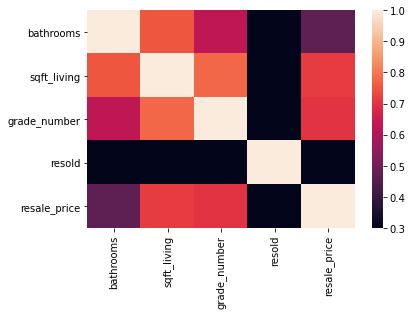

In [38]:
test_duplicate_corr = duplicated_df_resale.drop(['sqft_living15','bedrooms','sqft_above','price','index', 'id','yr_renovated','yr_built', 'sqft_lot','lat','long','sqft_lot15','zipcode','resale_money_gained','renovated','floors'], axis=1)
sns.heatmap(test_duplicate_corr.corr().abs(),vmin=.30, vmax=1);

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


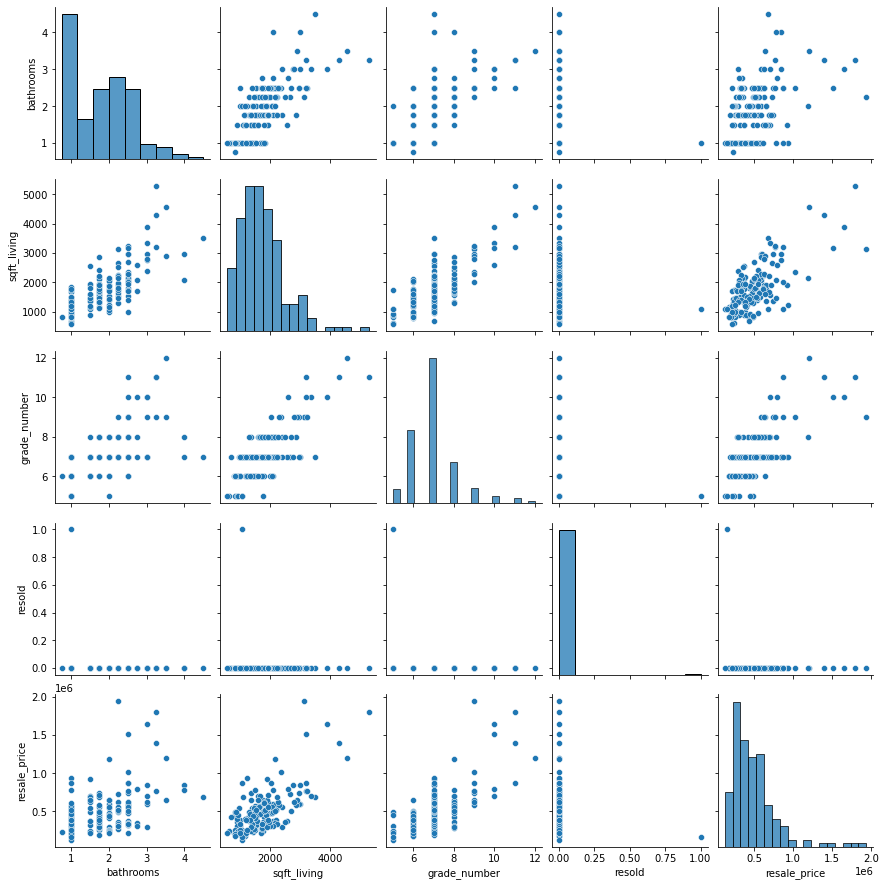

In [39]:
sns.pairplot(test_duplicate_corr);

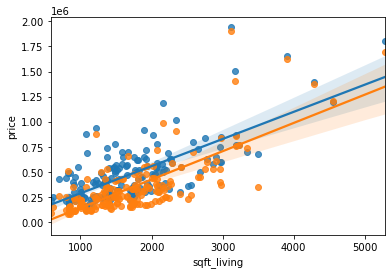

In [40]:
sns.regplot(x=duplicated_df_resale.sqft_living,y=duplicated_df_resale.resale_price);
sns.regplot(x=duplicated_df_resale.sqft_living,y=duplicated_df_resale.price);

In [41]:
# Houses that were bought and relisted are being sold on average at higher rates

In [42]:
formula = 'resale_money_gained ~ sqft_living'
sqft_resale_mod = ols(formula, duplicated_df_resale).fit()
sqft_resale_mod_summary = sqft_resale_mod.summary()
sqft_resale_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     resale_money_gained   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.237
Date:                 Tue, 29 Mar 2022   Prob (F-statistic):              0.268
Time:                         15:56:14   Log-Likelihood:                -2288.9
No. Observations:                  177   AIC:                             4582.
Df Residuals:                      175   BIC:                             4588.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.552e+05    1.9e+04      8.174      0.000    1.18e+05    1.93e+05
sqft_living   -11.1292     10.007     -1.112      0.268     -30.879       8.621
==============================================================================
Omnibus:                       19.100   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.821
Skew:                           0.829   Prob(JB):                     1.83e-05
Kurtosis:                       3.461   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is correlation and able to be to form a simple linear regression model between resale price and sqft_living.  


Need to look into resale houses more rencetly.  Look  into comparing houses around house boom eras

## Model of house price and city model

In [43]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,grade_number,resold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,7,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0,7,False
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,6,False
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,7,False
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,8,False
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,8,False
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,7,False
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,8,False


In [44]:
df_hanis = pd.read_csv('https://raw.githubusercontent.com/hanis-z/Phase-2-project/Hanis/individualNotebooks/housing_gdf_complete.csv')
df_hanis

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,coord,geometry,city,dist_seattle,neighborhood,in_seattle
0,0,8856004730,9/17/2014,199950.0,2,2.75,1590,20917,1.5,NO,...,47.2786,-122.250,1310,6000,"(-122.25, 47.2786)",POINT (392815.9311460542 31962.040946318088),Algona,38586.298196,NaN,False
1,1,3356406510,5/30/2014,196440.0,3,2.00,1560,7352,1.0,NO,...,47.2804,-122.251,1120,7950,"(-122.251, 47.2804)",POINT (392743.96777042677 32163.527499454583),Algona,38375.160433,NaN,False
2,2,3356404330,11/19/2014,206000.0,4,2.00,1720,7560,1.0,NO,...,47.2845,-122.250,1750,7988,"(-122.25, 47.2845)",POINT (392828.008518306 32617.90153434322),Algona,37943.562770,NaN,False
3,3,128500260,5/8/2014,262000.0,4,2.50,2020,6236,2.0,NO,...,47.2796,-122.247,1940,5076,"(-122.247, 47.2796)",POINT (393044.9257391654 32069.02917550225),Algona,38523.082722,NaN,False
4,4,8856004400,9/2/2014,235000.0,4,1.00,1610,24000,1.5,NO,...,47.2751,-122.252,1270,9600,"(-122.252, 47.2751)",POINT (392657.45531036914 31575.759156857133),Algona,38938.369932,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21667,21667,9808700370,6/23/2014,899000.0,3,1.00,1480,6978,2.0,NO,...,47.6497,-122.217,2660,13062,"(-122.217, 47.6497)",POINT (396054.35030430346 73169.14819915775),Yarrow Point,10695.015963,NaN,False
21668,21668,9809000010,1/6/2015,1630000.0,5,2.50,3090,16583,2.0,NO,...,47.6458,-122.218,3740,17853,"(-122.218, 47.6458)",POINT (395971.43242679926 72736.96475485197),Yarrow Point,10491.736637,NaN,False
21669,21669,9808700025,2/11/2015,1500000.0,3,1.50,1910,21374,1.0,NO,...,47.6453,-122.214,2850,16167,"(-122.214, 47.6453)",POINT (396270.91838183696 72675.98317698675),Yarrow Point,10764.715056,NaN,False
21670,21670,1925059254,5/7/2015,3000000.0,5,4.00,6670,16481,2.0,NO,...,47.6409,-122.221,4800,16607,"(-122.221, 47.6409)",POINT (395736.24545047607 72196.32795617428),Yarrow Point,10130.240401,NaN,False


In [45]:
#df = df.merge(df_hanis[['in_seattle', 'id']],how='inner', on='id')
#sum(df['in_seattle'] == 1) ,  sum(df_hanis['in_seattle'] == 1)

In [46]:
test_df = df_hanis[['price','in_seattle']]
test_df.corr()

,price,in_seattle
price,1.000000,0.094165
in_seattle,0.094165,1.000000


In [47]:
formula = 'price ~ in_seattle'
sqft_grade_mod = ols(formula, df_hanis).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.04e-44
Time:                        15:56:15   Log-Likelihood:            -3.0837e+05
No. Observations:               21672   AIC:                         6.167e+05
Df Residuals:                   21670   BIC:                         6.168e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.169e+05   2995.382    172.564      0.000    5.11e+05    5.23e+05
in_seattle[T.True]  7.469e+04   5364.047     13.924      0.000    6.42e+04    8.52e+04
==============================================================================
Omnibus:                    19356.194   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1176355.558
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      38.159   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
formula = 'price ~ in_seattle'
sqft_grade_mod = ols(formula, df_hanis).fit()
sqft_grade_mod_summary = sqft_grade_mod.summary()
sqft_grade_mod_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.04e-44
Time:                        15:56:31   Log-Likelihood:            -3.0837e+05
No. Observations:               21672   AIC:                         6.167e+05
Df Residuals:                   21670   BIC:                         6.168e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.169e+05   2995.382    172.564      0.000    5.11e+05    5.23e+05
in_seattle[T.True]  7.469e+04   5364.047     13.924      0.000    6.42e+04    8.52e+04
==============================================================================
Omnibus:                    19356.194   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1176355.558
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      38.159   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sqft_grade_mod.params

clean data
    traintestsplit
dummyregressor
    modelvalidation
first model
    modelvalidation
...
nth model
    modelvalidation